*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```batch_size.csv``` file before running

# Batch size analysis

Tuning was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2009 for testing

## Loading experiment logs

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('batch_size.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 45 rows and 57 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,mae_clipped,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,training_curve_path
0,20250510_101907,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17569,0.98219,0.09472,0.30776,0.17712,0.98256,0.04784,"1.15337,0.45702,0.40365,0.35015,0.29610,0.2475...","0.11602,0.10664,0.10006,0.10390,0.09492,0.0964...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250510_101926,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.17613,0.98107,0.09753,0.31230,0.17899,0.98197,0.07317,"1.54597,0.33733,0.31484,0.29316,0.26614,0.2350...","0.11137,0.10358,0.09633,0.09867,0.09604,0.0946...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250510_101931,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17807,0.98128,0.10074,0.31739,0.18114,0.98131,0.01191,"1.10538,0.42870,0.38389,0.33434,0.28278,0.2382...","0.11646,0.10537,0.10289,0.09714,0.09908,0.0978...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250510_101943,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.17096,0.98260,0.09162,0.30269,0.17401,0.98308,0.05421,"1.38637,0.33332,0.30721,0.28517,0.25858,0.2288...","0.11340,0.10273,0.10072,0.10172,0.09499,0.0949...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250510_101907,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17738,0.98166,0.09946,0.31537,0.18013,0.98177,0.03041,"0.73462,0.36040,0.25812,0.19738,0.17848,0.1745...","0.12028,0.09674,0.09847,0.09544,0.09637,0.0962...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Training time and performance metrics vs batch size

In [2]:
# Group by batch size and compute means
metrics_by_batch = df.groupby('batch_size').mean(numeric_only=True).reset_index()

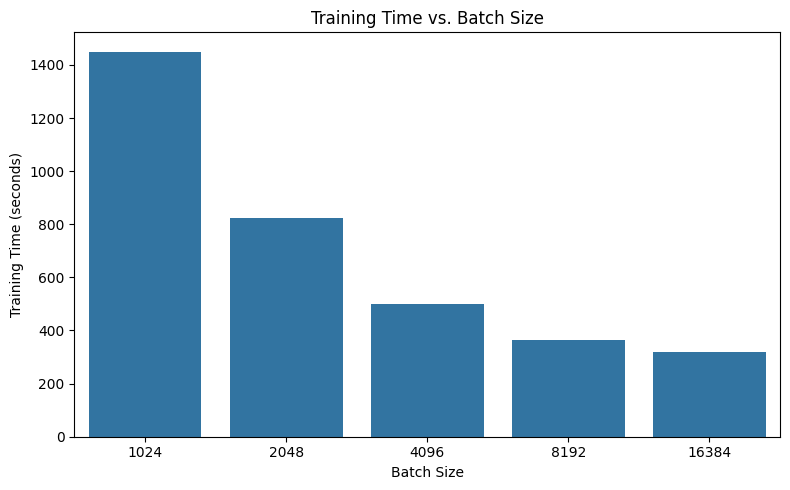

In [3]:
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_by_batch, x='batch_size', y='training_duration_sec')
plt.title('Training Time vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (seconds)')
plt.tight_layout()
plt.show()

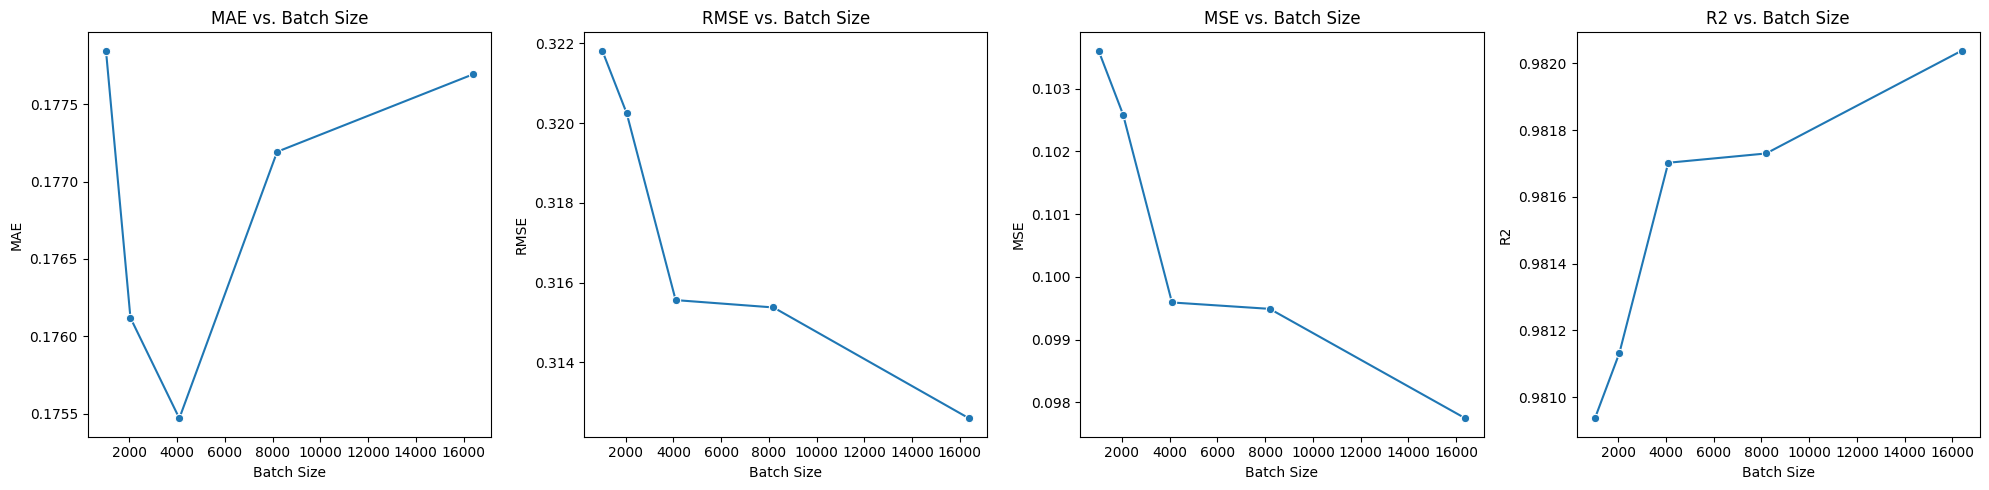

In [4]:
metrics = ['mae', 'rmse', 'mse', 'r2']

fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    sns.lineplot(
        data=metrics_by_batch,
        x='batch_size',
        y=metric,
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{metric.upper()} vs. Batch Size')
    axes[i].set_xlabel('Batch Size')
    axes[i].set_ylabel(metric.upper())

plt.tight_layout()
plt.show()
